### Objective: Predict future repayment behavior or business success.

 From our dataset, we don’t have explicit repayment data, so we can’t directly model repayment behavior (e.g. whether a loan was paid back). However, we can model loan eligibility or likelihood to receive credit, which is a strong proxy in credit scoring when repayment data is missing. We will use this as a proxy for future repayment behavior. We want to establish creditworthiness signals based on:

**Farm productivity**

**Asset ownership**

**Financial behavior**

**Demographics**

In [37]:
# Imporing necessary libraries and exploring the dataset
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
data = pd.read_csv(r"c:\Users\USER\Downloads\agric_connect_summit_hackathon_2018_2019_dataset.csv").drop_duplicates().dropna(how = "all", axis = 1)
data.head()

,zone,gender,age,year_of_birth,indiv-hhid,sector,education,marital status,year_plot_acquired,legal_title_certificate,...,price_paid_for_crop_seed,financed_purchase_cropseed,bank_account,insurance,borrowed/loan,lender type,reason_for_loan,owned_non_agric_business,owned_trading_business,year_plot_acquired (groups)
0,north east,male,42,1976,420005,rural,yes,yes,NaN,NaN,...,0.0,NaN,no,no,no,NaN,NaN,no,no,(Blank)
1,north east,female,32,1989,520005,rural,yes,yes,NaN,NaN,...,0.0,NaN,no,no,no,NaN,NaN,no,no,(Blank)
2,north east,male,31,1988,620044,rural,yes,yes,NaN,NaN,...,0.0,NaN,no,no,no,NaN,NaN,no,no,(Blank)
3,north east,male,69,1950,120050,rural,yes,yes,NaN,NaN,...,0.0,NaN,no,no,no,NaN,NaN,no,no,(Blank)
4,north east,female,64,1955,220050,rural,yes,yes,NaN,NaN,...,0.0,NaN,no,no,no,NaN,NaN,no,no,(Blank)


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11564 entries, 0 to 11563
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   zone                         11564 non-null  object 
 1   gender                       11564 non-null  object 
 2   age                          11564 non-null  int64  
 3   year_of_birth                11564 non-null  int64  
 4   indiv-hhid                   11564 non-null  int64  
 5   sector                       11403 non-null  object 
 6   education                    11403 non-null  object 
 7   marital status               11403 non-null  object 
 8   year_plot_acquired           1950 non-null   float64
 9   legal_title_certificate      1950 non-null   object 
 10  legal_title_right0fO         1950 non-null   object 
 11  legal_title_customary        1950 non-null   object 
 12  legal_title_deed             1950 non-null   object 
 13  current_price_of

In [39]:
data.describe()

,age,year_of_birth,indiv-hhid,year_plot_acquired,current_price_of_plot,planted_crop(quantity),planted_crop(unit),harvested_crop(quantity),harvested_crop(unit),harvested_crop_sold,value_harvested_sold,harvested_crop_lost,price_paid_for_crop_seed
count,11564.000000,11564.000000,1.156400e+04,1950.000000,1.950000e+03,7808.000000,7808.000000,7706.000000,7706.000000,7435.000000,7.435000e+03,7435.000000,7844.00000
mean,38.433068,1979.215150,2.463426e+06,2792.810256,4.603820e+06,766.269211,73.047387,42.582312,94.906826,9.688763,2.131003e+04,0.057886,1470.67899
std,16.041267,16.094062,2.615151e+06,2389.000261,2.170488e+07,18529.745333,66.634859,352.875976,60.955484,72.196896,7.132757e+04,1.251631,6866.24215
min,18.000000,1887.000000,1.100010e+05,1950.000000,3.500000e+02,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.00000
25%,25.000000,1968.000000,1.129006e+06,1996.000000,3.000000e+05,3.000000,30.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.00000
50%,35.000000,1982.000000,1.544610e+06,2007.000000,1.000000e+06,5.000000,50.000000,4.000000,130.000000,0.000000,0.000000e+00,0.000000,0.00000
75%,50.000000,1993.000000,3.169108e+06,2014.000000,3.000000e+06,15.000000,100.000000,10.000000,130.000000,4.000000,2.000000e+04,0.000000,600.00000
max,130.000000,2014.000000,2.920019e+07,9999.000000,5.000000e+08,700000.000000,900.000000,8000.000000,211.000000,2000.000000,2.604000e+06,50.000000,240000.00000



### 🎯 Target Column

1. `borrowed/loan` — (Did they receive a loan?)

---

### 🧩 Candidate Feature Columns

**Demographics**

2\. `gender`

3\. `age`

4\. `education`

5\. `marital status`

6\. `zone`

7\. `sector`


**Financial Behavior**

8\. `bank_account`

9\. `insurance`

**Asset ownership**

10\. `owned_non_agric_business`

11\. `owned_trading_business`

**Farm productivity**

12\. `purchased_crop_seed`

13\. `price_paid_for_crop_seed`

14\. `financed_purchase_cropseed`

15\. `planted_crop(quantity)`

16\. `planted_crop(unit)`

17\. `harvested_crop(quantity)`

18\. `harvested_crop(unit)`

---

### We will explore the features and pick the most suitable ones for our prediction.

In [40]:
# Our target column contains binary variables indicating whether the farmer has borrowed/loaned money or not.
data['borrowed/loan'].unique()

array(['no', 'yes'], dtype=object)

In [41]:
def inspect_column(df, column_name):
    """ Function to inspect a specific column in the DataFrame."""
    print(f"\n📌 Column: {column_name}")
    print("-" * 30)
    print("Unique values:", df[column_name].unique())
    print("Value counts:\n", df[column_name].value_counts(dropna=False))
    print("Missing values:", df[column_name].isna().sum())

    # Check for potential "strange" entries (e.g., extra whitespace, case variations)
    if df[column_name].dtype == "object":
        cleaned = df[column_name].str.strip().str.lower()
        print("\nNormalized unique values:", cleaned.unique())
        print("Normalized value counts:\n", cleaned.value_counts(dropna=False))


In [42]:
# We start with the "gender" column 

inspect_column(data, 'gender')



📌 Column: gender
------------------------------
Unique values: ['male' 'female']
Value counts:
 gender
female    6058
male      5506
Name: count, dtype: int64
Missing values: 0

Normalized unique values: ['male' 'female']
Normalized value counts:
 gender
female    6058
male      5506
Name: count, dtype: int64


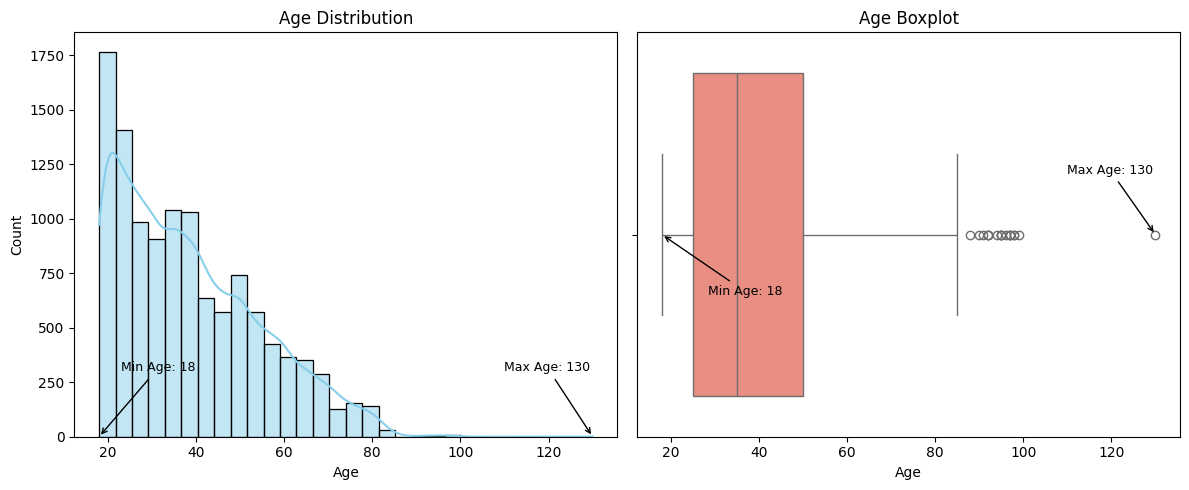

In [43]:
# The "gender" column is fine. Next is the "age" column

# Checking distribution of age
plt.figure(figsize=(12, 5))

min_age = data['age'].min()
max_age = data['age'].max()

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(data['age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')

# Annotate min and max on histogram 
plt.annotate(f'Min Age: {min_age}', xy=(min_age, 0), xytext=(min_age + 5, 300),
             arrowprops=dict(facecolor='green', arrowstyle='->'), fontsize=9)
plt.annotate(f'Max Age: {max_age}', xy=(max_age, 0), xytext=(max_age - 20, 300),
             arrowprops=dict(facecolor='red', arrowstyle='->'), fontsize=9)

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=data['age'], color='salmon')
plt.title('Age Boxplot')
plt.xlabel('Age')

# Annotate min and max on boxplot (min moved 75% more to the right)
plt.annotate(f'Min Age: {min_age}', xy=(min_age, 0), xytext=(min_age + 10.5, 0.15),
             arrowprops=dict(facecolor='green', arrowstyle='->'), fontsize=9)
plt.annotate(f'Max Age: {max_age}', xy=(max_age, 0), xytext=(max_age - 20, -0.15),
             arrowprops=dict(facecolor='red', arrowstyle='->'), fontsize=9)

plt.tight_layout()
plt.show()


### The "age" column contains some outliers. We can restrict the age range to 90 and below, since most people cannot actively farm at that age.


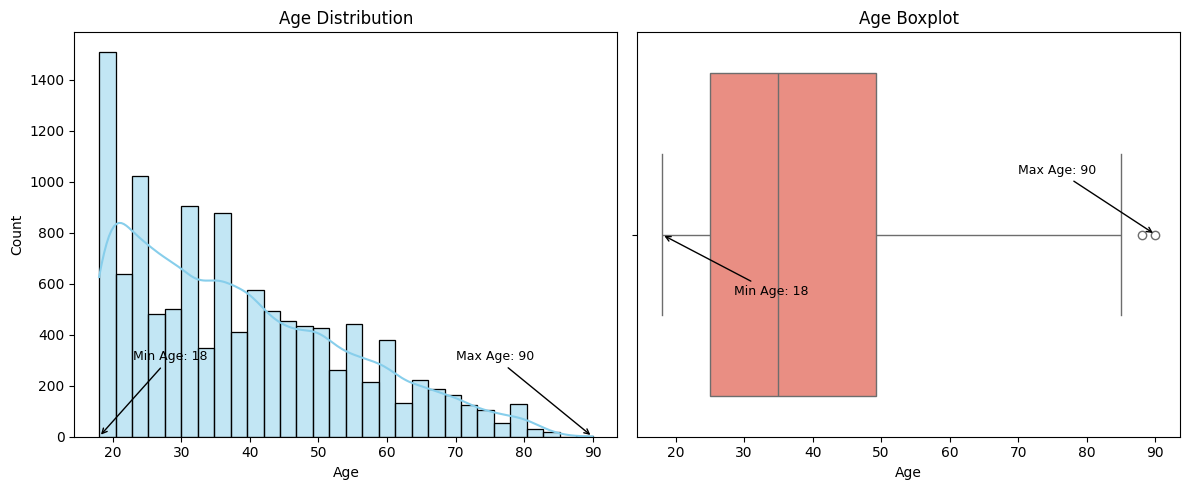

In [44]:

data = data[data['age'] <= 90]


# The "gender" column is fine. Next is the "age" column

# Checking distribution of age
plt.figure(figsize=(12, 5))

min_age = data['age'].min()
max_age = data['age'].max()

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(data['age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')

# Annotate min and max on histogram 
plt.annotate(f'Min Age: {min_age}', xy=(min_age, 0), xytext=(min_age + 5, 300),
             arrowprops=dict(facecolor='green', arrowstyle='->'), fontsize=9)
plt.annotate(f'Max Age: {max_age}', xy=(max_age, 0), xytext=(max_age - 20, 300),
             arrowprops=dict(facecolor='red', arrowstyle='->'), fontsize=9)

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=data['age'], color='salmon')
plt.title('Age Boxplot')
plt.xlabel('Age')

# Annotate min and max on boxplot (min moved 75% more to the right)
plt.annotate(f'Min Age: {min_age}', xy=(min_age, 0), xytext=(min_age + 10.5, 0.15),
             arrowprops=dict(facecolor='green', arrowstyle='->'), fontsize=9)
plt.annotate(f'Max Age: {max_age}', xy=(max_age, 0), xytext=(max_age - 20, -0.15),
             arrowprops=dict(facecolor='red', arrowstyle='->'), fontsize=9)

plt.tight_layout()
plt.show()
